In [1]:
import xgi
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import itertools
from mpl_toolkits import mplot3d

In [2]:
links = [[1, 2], [1, 3], [5, 6], [1, 7]]
triangles = [[3, 5, 7], [2, 7, 1], [6, 10, 15]]
squares = [[7, 8, 9, 10]]
pentagons = [[1, 11, 12, 13, 14]]
edges = links + triangles + squares + pentagons

In [3]:
H = xgi.Hypergraph(edges)

filtering_parameters = np.arange(
    H.edges.size.min(), H.edges.size.max() + 1, 1, dtype=int
)

uniform_filtering = [
    xgi.subhypergraph(H, edges=H.edges.filterby("size", k, "eq")).copy()
    for k in filtering_parameters
]
geq_filtering = [
    xgi.subhypergraph(H, edges=H.edges.filterby("size", k, "geq")).copy()
    for k in filtering_parameters
]
leq_filtering = [
    xgi.subhypergraph(H, edges=H.edges.filterby("size", k, "leq")).copy()
    for k in filtering_parameters
]
exclusion_filtering = [
    xgi.subhypergraph(H, edges=H.edges.filterby("size", k, "neq")).copy()
    for k in filtering_parameters
]
filterings = [uniform_filtering, geq_filtering, leq_filtering, exclusion_filtering]

In [4]:
def color_edges(H):
    link_color = "#000000"
    triangle_color = "#648FFF"
    square_color = "#785EF0"
    pentagon_color = "#DC267F"

    dyad_colors = []
    edge_colors = []

    for s in H.edges.size.asnumpy():
        if s == 2:
            dyad_colors.append(link_color)
        elif s == 3:
            edge_colors.append(triangle_color)
        elif s == 4:
            edge_colors.append(square_color)
        elif s == 5:
            edge_colors.append(pentagon_color)
    return dyad_colors, edge_colors

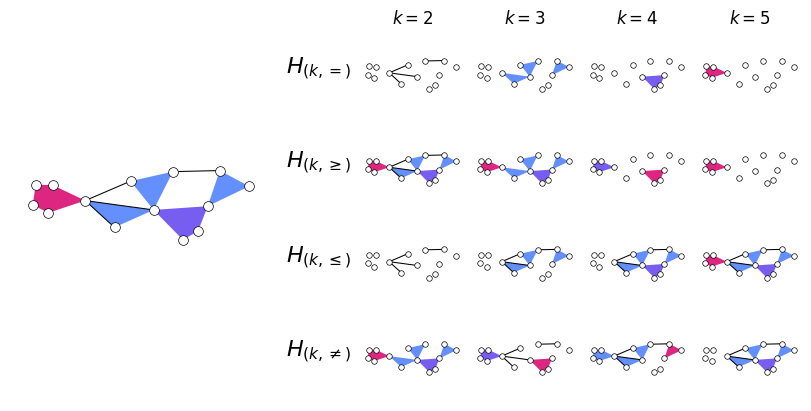

In [48]:
pos = xgi.pca_transform(xgi.pairwise_spring_layout(H, seed=3))

fig = plt.figure(layout="constrained", figsize=(8, 4))

gs_leftright = gridspec.GridSpec(1, 3, figure=fig, wspace=0.075)

gs_panels = gridspec.GridSpecFromSubplotSpec(4, 4, subplot_spec=gs_leftright[1:])

ax_left = fig.add_subplot(gs_leftright[0])
lc, ec = color_edges(H)
xgi.draw(H, pos=pos, ax=ax_left, dyad_color=lc, edge_fc=ec, node_size=7, node_lw=0.5, dyad_lw=0.75, alpha=1)

labels = [r"$H_{(k, =)}$", r"$H_{(k, \geq)}$", r"$H_{(k, \leq)}$", r"$H_{(k, \neq)}$"]

for i, j in itertools.product(range(4), repeat=2):
    ax = fig.add_subplot(gs_panels[i, j])
    lc, ec = color_edges(filterings[i][j])
    xgi.draw(filterings[i][j], pos=pos, ax=ax, node_size=4, dyad_color=lc, dyad_lw=0.75, node_lw=0.5, edge_fc=ec, alpha=1)
    if i == 0:
        ax.set_title(rf"$k={j + 2}$")

    if j == 0:
        ax.text(-3.5, 0, labels[i], fontsize=16)
plt.savefig("Figures/fig1.pdf", dpi=1000)
plt.savefig("Figures/fig1.png", dpi=1000)
plt.show()

In [6]:
def get_assortativity(filtering, assortativity_fcn, **kwargs):
    a = np.zeros(len(filtering))
    for i in range(len(filtering)):
        try:
            a[i] = assortativity_fcn(filtering[i], **kwargs)
        except:
            a[i] = np.NaN
    return a

da = get_assortativity(filterings[0], xgi.dynamical_assortativity)

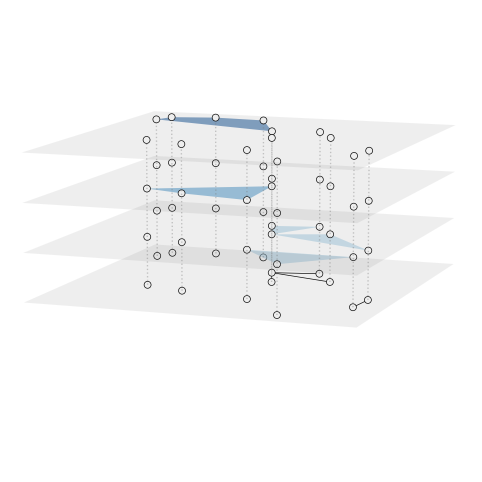

In [37]:
import seaborn as sns
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_axis_off()
xgi.draw_multilayer(H, ax=ax)
plt.savefig("Figures/multilayer_test.svg", dpi=1000)
plt.show()


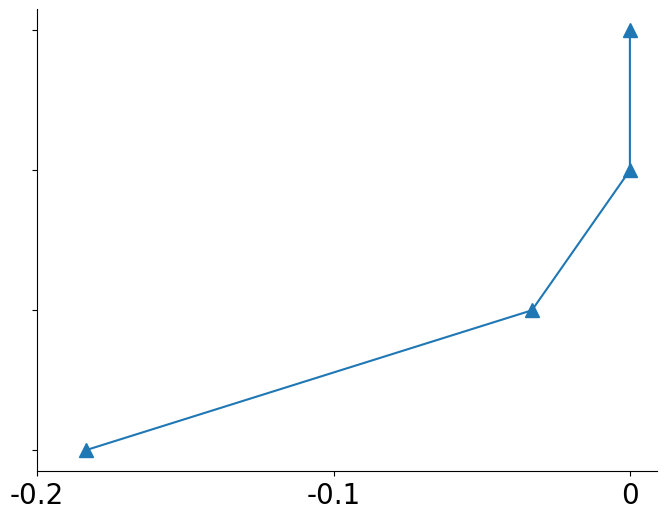

In [38]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(da, filtering_parameters, '^-', markersize=10)
ax.set_xticks([-0.2, -0.1, 0], [-0.2, -0.1, 0], fontsize=20)
ax.set_yticks([2, 3, 4, 5], ["", "", "", ""])
sns.despine()
plt.savefig("Figures/multilayer_function_test.svg", dpi=1000)
